# Mini-Project A - Prices & Returns

## 1 Imports & Config

In [1]:
import sys, pandas as pd, yfinance as yf, numpy as np, matplotlib.pyplot as plt, arch
print("Notebook running from:", sys.executable)

Notebook running from: c:\Tools\miniconda3\envs\quant\python.exe


## 2 Download or Load Data

In [6]:
from pathlib import Path
import pandas as pd, yfinance as yf

# -------------------Configuration-------------------
TICKERS     = ["MSFT", "AAPL", "SPY"]
START_DATE  = "2014-01-01"           # 10-year window
END_DATE    = None                   # today
DATA_PATH   = Path("../data/raw_yfinance")
DATA_PATH.mkdir(parents=True, exist_ok=True)
CACHE_FILE  = DATA_PATH / "prices_10y.parquet"

# -------------------Load Data-------------------
prices = yf.download(
        TICKERS,
        start=START_DATE,
        end=END_DATE,
        auto_adjust=True,
        progress=False,
        group_by="column"
    )

# Keep only the 'Close' level and drop rows with all-Na
prices = prices["Close"].dropna(how="all")


prices.head()

Ticker,AAPL,MSFT,SPY
Date,,,
2014-01-02,17.192825,30.939619,150.283508
2014-01-03,16.815166,30.731466,150.258850
2014-01-06,16.906862,30.082033,149.823456
2014-01-07,16.785952,30.315157,150.743622
2014-01-08,16.892254,29.773972,150.776505


## 3 Quick Inspect

In [7]:
print("Shape:", prices.shape)
display(prices.head())
print("Missing values total:", prices.isna().sum().sum())


Shape: (2875, 3)


Ticker,AAPL,MSFT,SPY
Date,,,
2014-01-02,17.192825,30.939619,150.283508
2014-01-03,16.815166,30.731466,150.258850
2014-01-06,16.906862,30.082033,149.823456
2014-01-07,16.785952,30.315157,150.743622
2014-01-08,16.892254,29.773972,150.776505


Missing values total: 0


## 4 Compute Log Returns

In [8]:
import numpy as np

# 4 Compute Log Returns
returns = np.log(prices / prices.shift(1))
returns = returns.dropna()               # drop the first NaN row

print("Shape of returns:", returns.shape)
display(returns.head())
print("Missing values total:", returns.isna().any().any())

Shape of returns: (2874, 3)


Ticker,AAPL,MSFT,SPY
Date,,,
2014-01-03,-0.022211,-0.006750,-0.000164
2014-01-06,0.005438,-0.021359,-0.002902
2014-01-07,-0.007177,0.007720,0.006123
2014-01-08,0.006313,-0.018013,0.000218
2014-01-09,-0.012852,-0.006453,0.000653


Missing values total: False


## 5 Plot Prices vs Returns

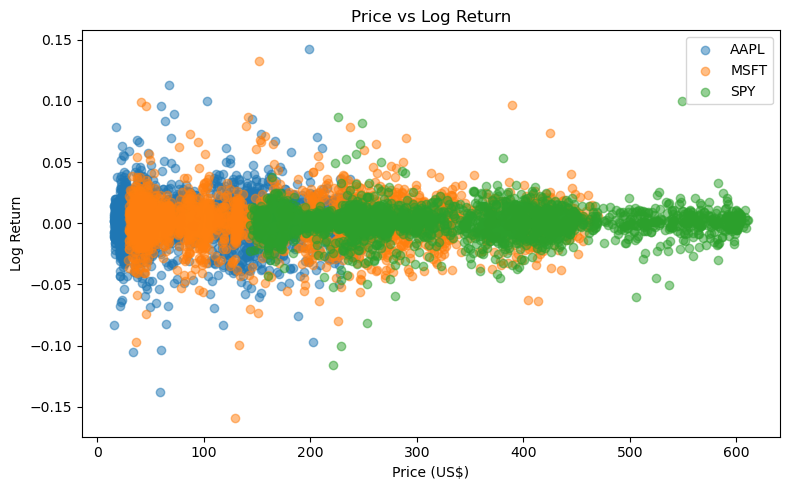

In [9]:
# 5 Plot Prices vs Returns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for ticker in prices.columns:
    x = prices[ticker].iloc[1:],
    y = returns[ticker],
    plt.scatter(
        x=x,
        y=y,
        label=ticker,
        alpha=0.5)

plt.xlabel("Price (US$)")
plt.ylabel("Log Return")
plt.title("Price vs Log Return")
plt.legend()
plt.tight_layout()
plt.show()

## 6 Compounded Growth Chart

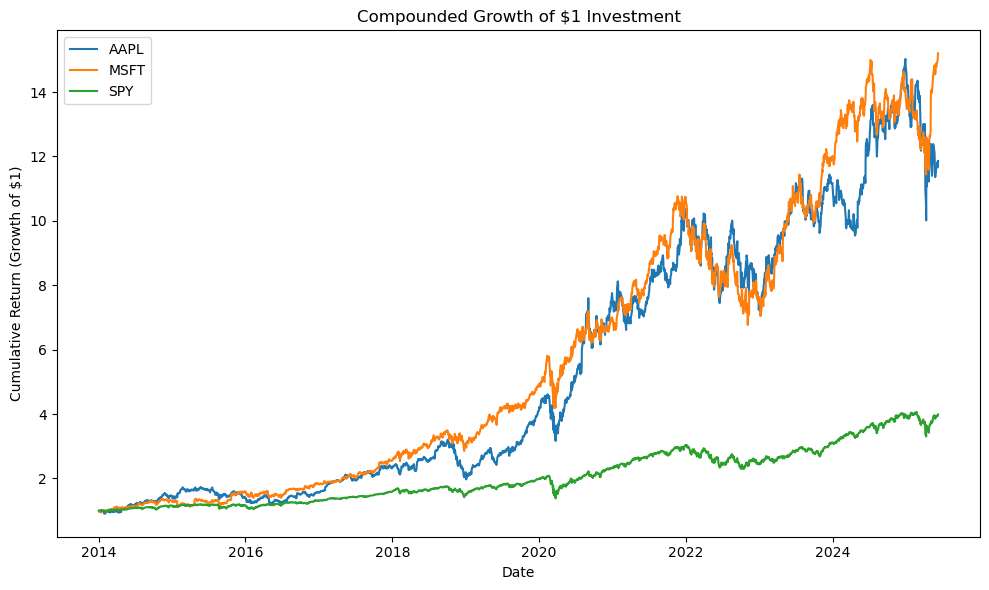

Ticker           AAPL       MSFT       SPY
Date                                      
2014-01-03   0.978034   0.993272  0.999836
2014-01-06   0.983367   0.972282  0.996939
2014-01-07   0.976335   0.979817  1.003062
2014-01-08   0.982518   0.962325  1.003280
2014-01-09   0.969971   0.956135  1.003936
...               ...        ...       ...
2025-06-02  11.731638  14.931341  3.943946
2025-06-03  11.822955  14.963662  3.966437
2025-06-04  11.796782  14.992751  3.965372
2025-06-05  11.669403  15.115894  3.946208
2025-06-06  11.860761  15.203161  3.986732

[2874 rows x 3 columns]


In [11]:
# 6 – Extra Exercise: Compounded Growth Chart
#    Plot the cumulative, compounded return (growth of $1) for each ticker
#    using the `prices` DataFrame you just downloaded in Step 2.

import matplotlib.pyplot as plt

# 1. Compute simple daily returns and drop the first NaN
returns = prices.pct_change().dropna()

# 2. Build compounded growth from a $1 starting point
cum_growth = (1 + returns).cumprod()

# 3. Plot
fig, ax = plt.subplots(figsize=(10, 6))
for ticker in cum_growth.columns:
    ax.plot(cum_growth.index, cum_growth[ticker], label=ticker)

ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Return (Growth of $1)")
ax.set_title("Compounded Growth of $1 Investment")
ax.legend()
plt.tight_layout()
plt.show()

print(cum_growth)


## 7 Next Steps

### 7.1 Descriptive statistics

In [ ]:
# 7.1 Descriptive stats
stats = returns.describe().T
stats["skew"]   = returns.skew()
stats["kurt"]   = returns.kurtosis()
stats


,count,mean,std,min,25%,50%,75%,max,skew,kurt
Ticker,,,,,,,,,,
AAPL,2871.0,0.001023,0.018036,-0.128647,-0.007170,0.000998,0.010129,0.153288,0.118038,6.772616
MSFT,2871.0,0.001084,0.016822,-0.147390,-0.006789,0.000892,0.009627,0.142169,0.155103,7.908589
SPY,2871.0,0.000542,0.011091,-0.109424,-0.003687,0.000652,0.005794,0.105019,-0.308632,14.268834


### 7.2 Correlation matrix

Ticker      AAPL      MSFT       SPY
Ticker                              
AAPL    1.000000  0.656515  0.740536
MSFT    0.656515  1.000000  0.783005
SPY     0.740536  0.783005  1.000000


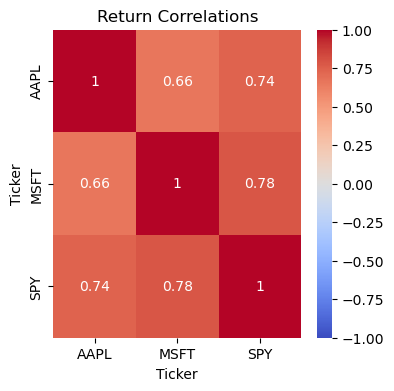

In [12]:
# 7.2 Correlations
corr = returns.corr()
print(corr)

import seaborn as sns
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Return Correlations")
plt.show()


### 7.3 Rolling volatility

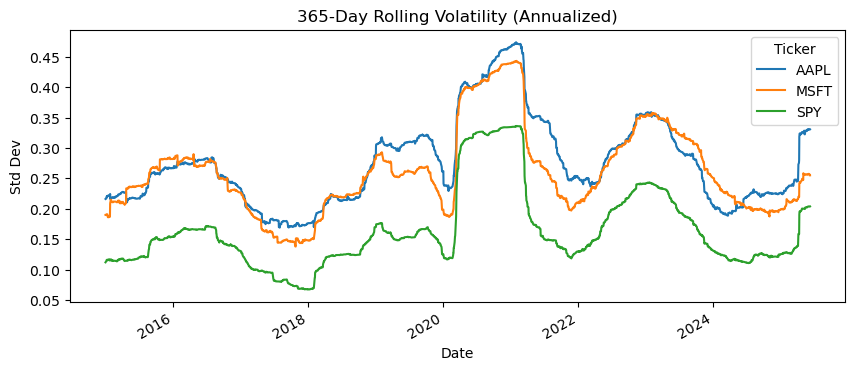

In [13]:
# 7.3 Rolling vol (annualized)
rol_std = returns.rolling(window=252).std() * np.sqrt(252)
rol_std.plot(figsize=(10,4))
plt.title("365-Day Rolling Volatility (Annualized)")
plt.ylabel("Std Dev")
plt.show()


### 7.4 Return distributions

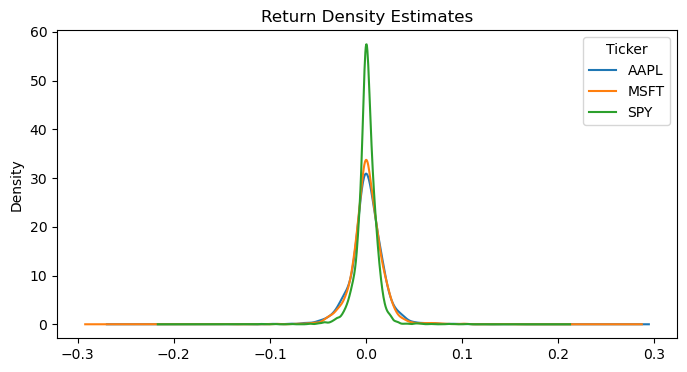

In [14]:
# 7.4 Return distributions
returns.plot(kind="kde", figsize=(8,4))
plt.title("Return Density Estimates")
plt.show()

